In [1]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.axes_style() # посмотреть параметры стиля

# поменять параметры и задать этот стиль для всех графиков
sns.set_style("white", {'ytick.left': True, 'axes.spines.right': False, 'axes.spines.top': False}) 

---

In [3]:
# https://www.kaggle.com/kingabzpro/heart-disease-patients - описание переменных см здесь
heart = pd.read_csv('heart_disease_patients.csv')
heart.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [5]:
heart['sex'] = heart['sex'].astype(str)
heart['chestpaintype'] = heart['cp'].astype(str)
heart['fastingbldsgr'] = heart['fbs'].astype(str)
heart['restecg'] = heart['restecg'].astype(str)
heart['exang'] = heart['exang'].astype(str)
heart['slope'] = heart['slope'].astype(str)

heart_num = heart.drop(['sex', 'chestpaintype', 'fastingbldsgr', 'restecg', 'exang', 'cp', 'fbs', 'slope'], axis=1)
heart_cat = heart[['sex', 'chestpaintype', 'fastingbldsgr', 'restecg', 'exang', 'slope']]

In [6]:
heart_num.head()

,id,age,trestbps,chol,thalach,oldpeak
0,1,63,145,233,150,2.3
1,2,67,160,286,108,1.5
2,3,67,120,229,129,2.6
3,4,37,130,250,187,3.5
4,5,41,130,204,172,1.4


In [7]:
heart_cat.head()

,sex,chestpaintype,fastingbldsgr,restecg,exang,slope
0,1,1,1,2,0,3
1,1,4,0,2,1,2
2,1,4,0,2,1,2
3,1,3,0,0,0,3
4,0,2,0,2,0,1


Sex 1 count: 206
Sex 0 count: 97


<AxesSubplot:xlabel='sex', ylabel='count'>

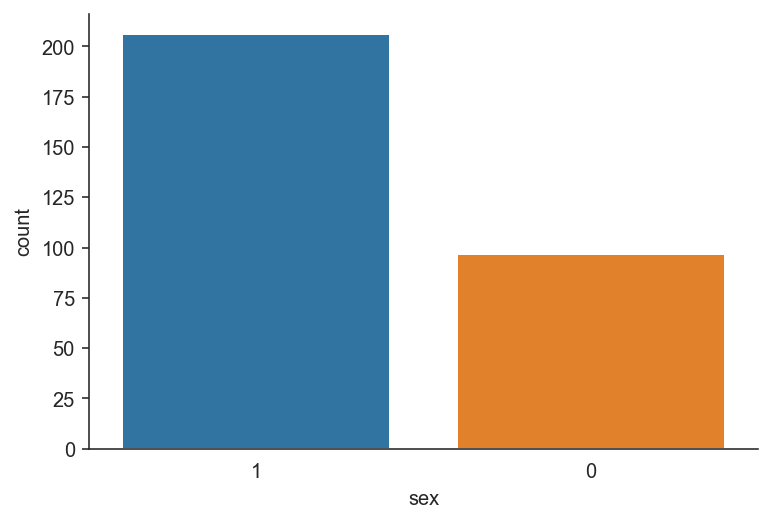

In [8]:
# 1. сколько мужчин и сколько женщин в датасете?
print(f"Sex {heart_cat.sex.value_counts().index[0]} count: {heart_cat.sex.value_counts()[0]}")
print(f"Sex {heart_cat.sex.value_counts().index[1]} count: {heart_cat.sex.value_counts()[1]}")
sns.countplot(x="sex", data=heart_cat)

<AxesSubplot:xlabel='age', ylabel='chol'>

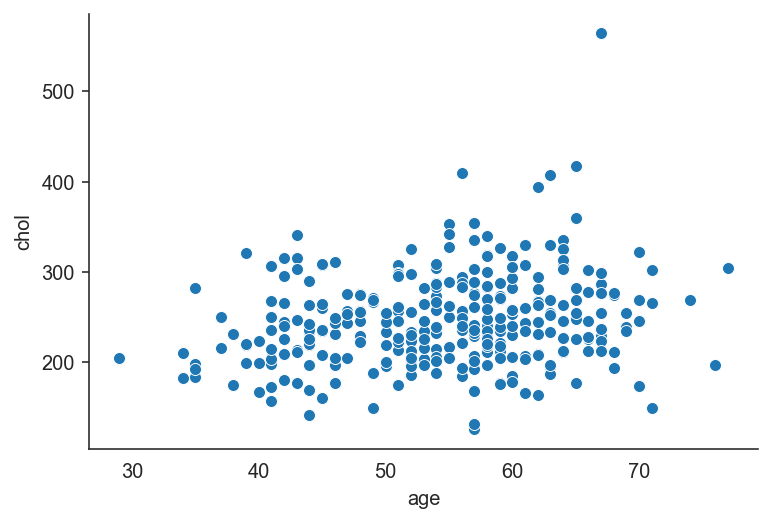

In [9]:
# 2. как связано значение холестерола и возраст?
sns.scatterplot(data=heart_num, x='age', y='chol')

<AxesSubplot:xlabel='chol', ylabel='Density'>

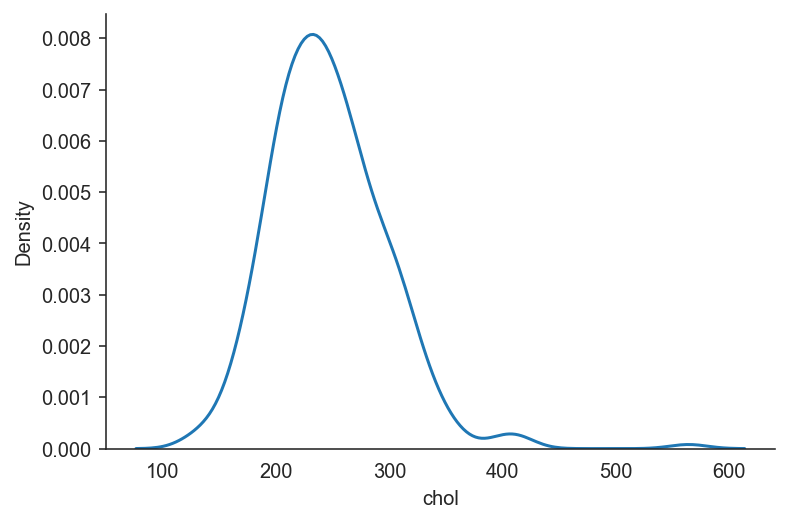

In [10]:
# 3. как распределена переменная chol?
sns.kdeplot(data=heart_num, x="chol")

<AxesSubplot:xlabel='chestpaintype', ylabel='trestbps'>

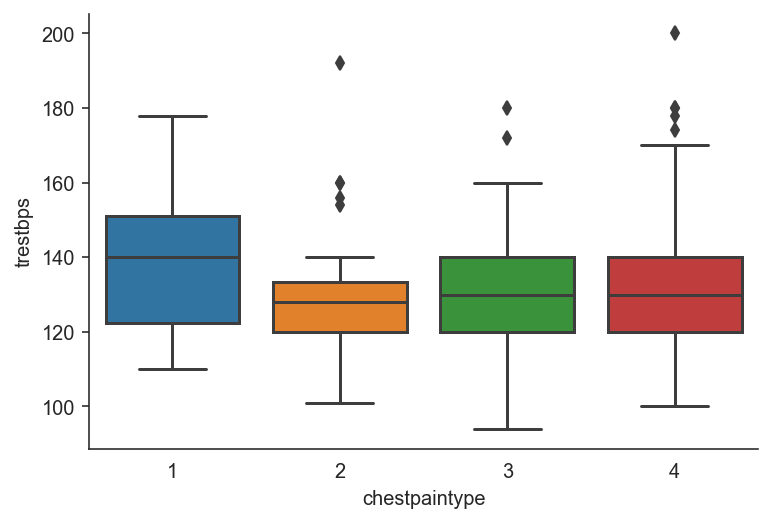

In [11]:
# 4. сравните медианный уровень/распределение показателей давления у людей с разным типом боли
sns.boxplot(x=heart.chestpaintype, y=heart.trestbps, data=heart, order=['1', '2', '3', '4'])

<AxesSubplot:xlabel='chol', ylabel='Density'>

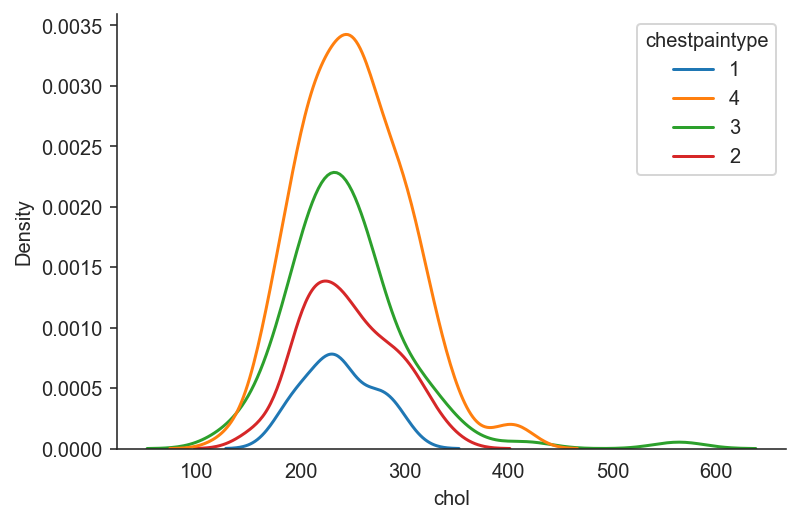

In [12]:
sns.kdeplot(data=heart, x='chol', hue='chestpaintype')

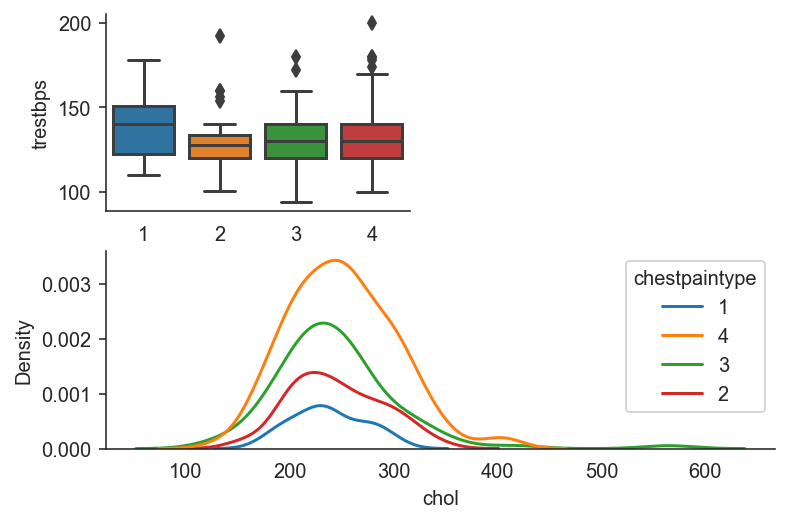

In [13]:
plt.subplot(2, 2, 1)
sns.boxplot(x=heart.chestpaintype, y=heart.trestbps, data=heart, order=['1', '2', '3', '4'])


plt.subplot(2, 1, 2)
sns.kdeplot(data=heart, x='chol', hue='chestpaintype')

plt.show()

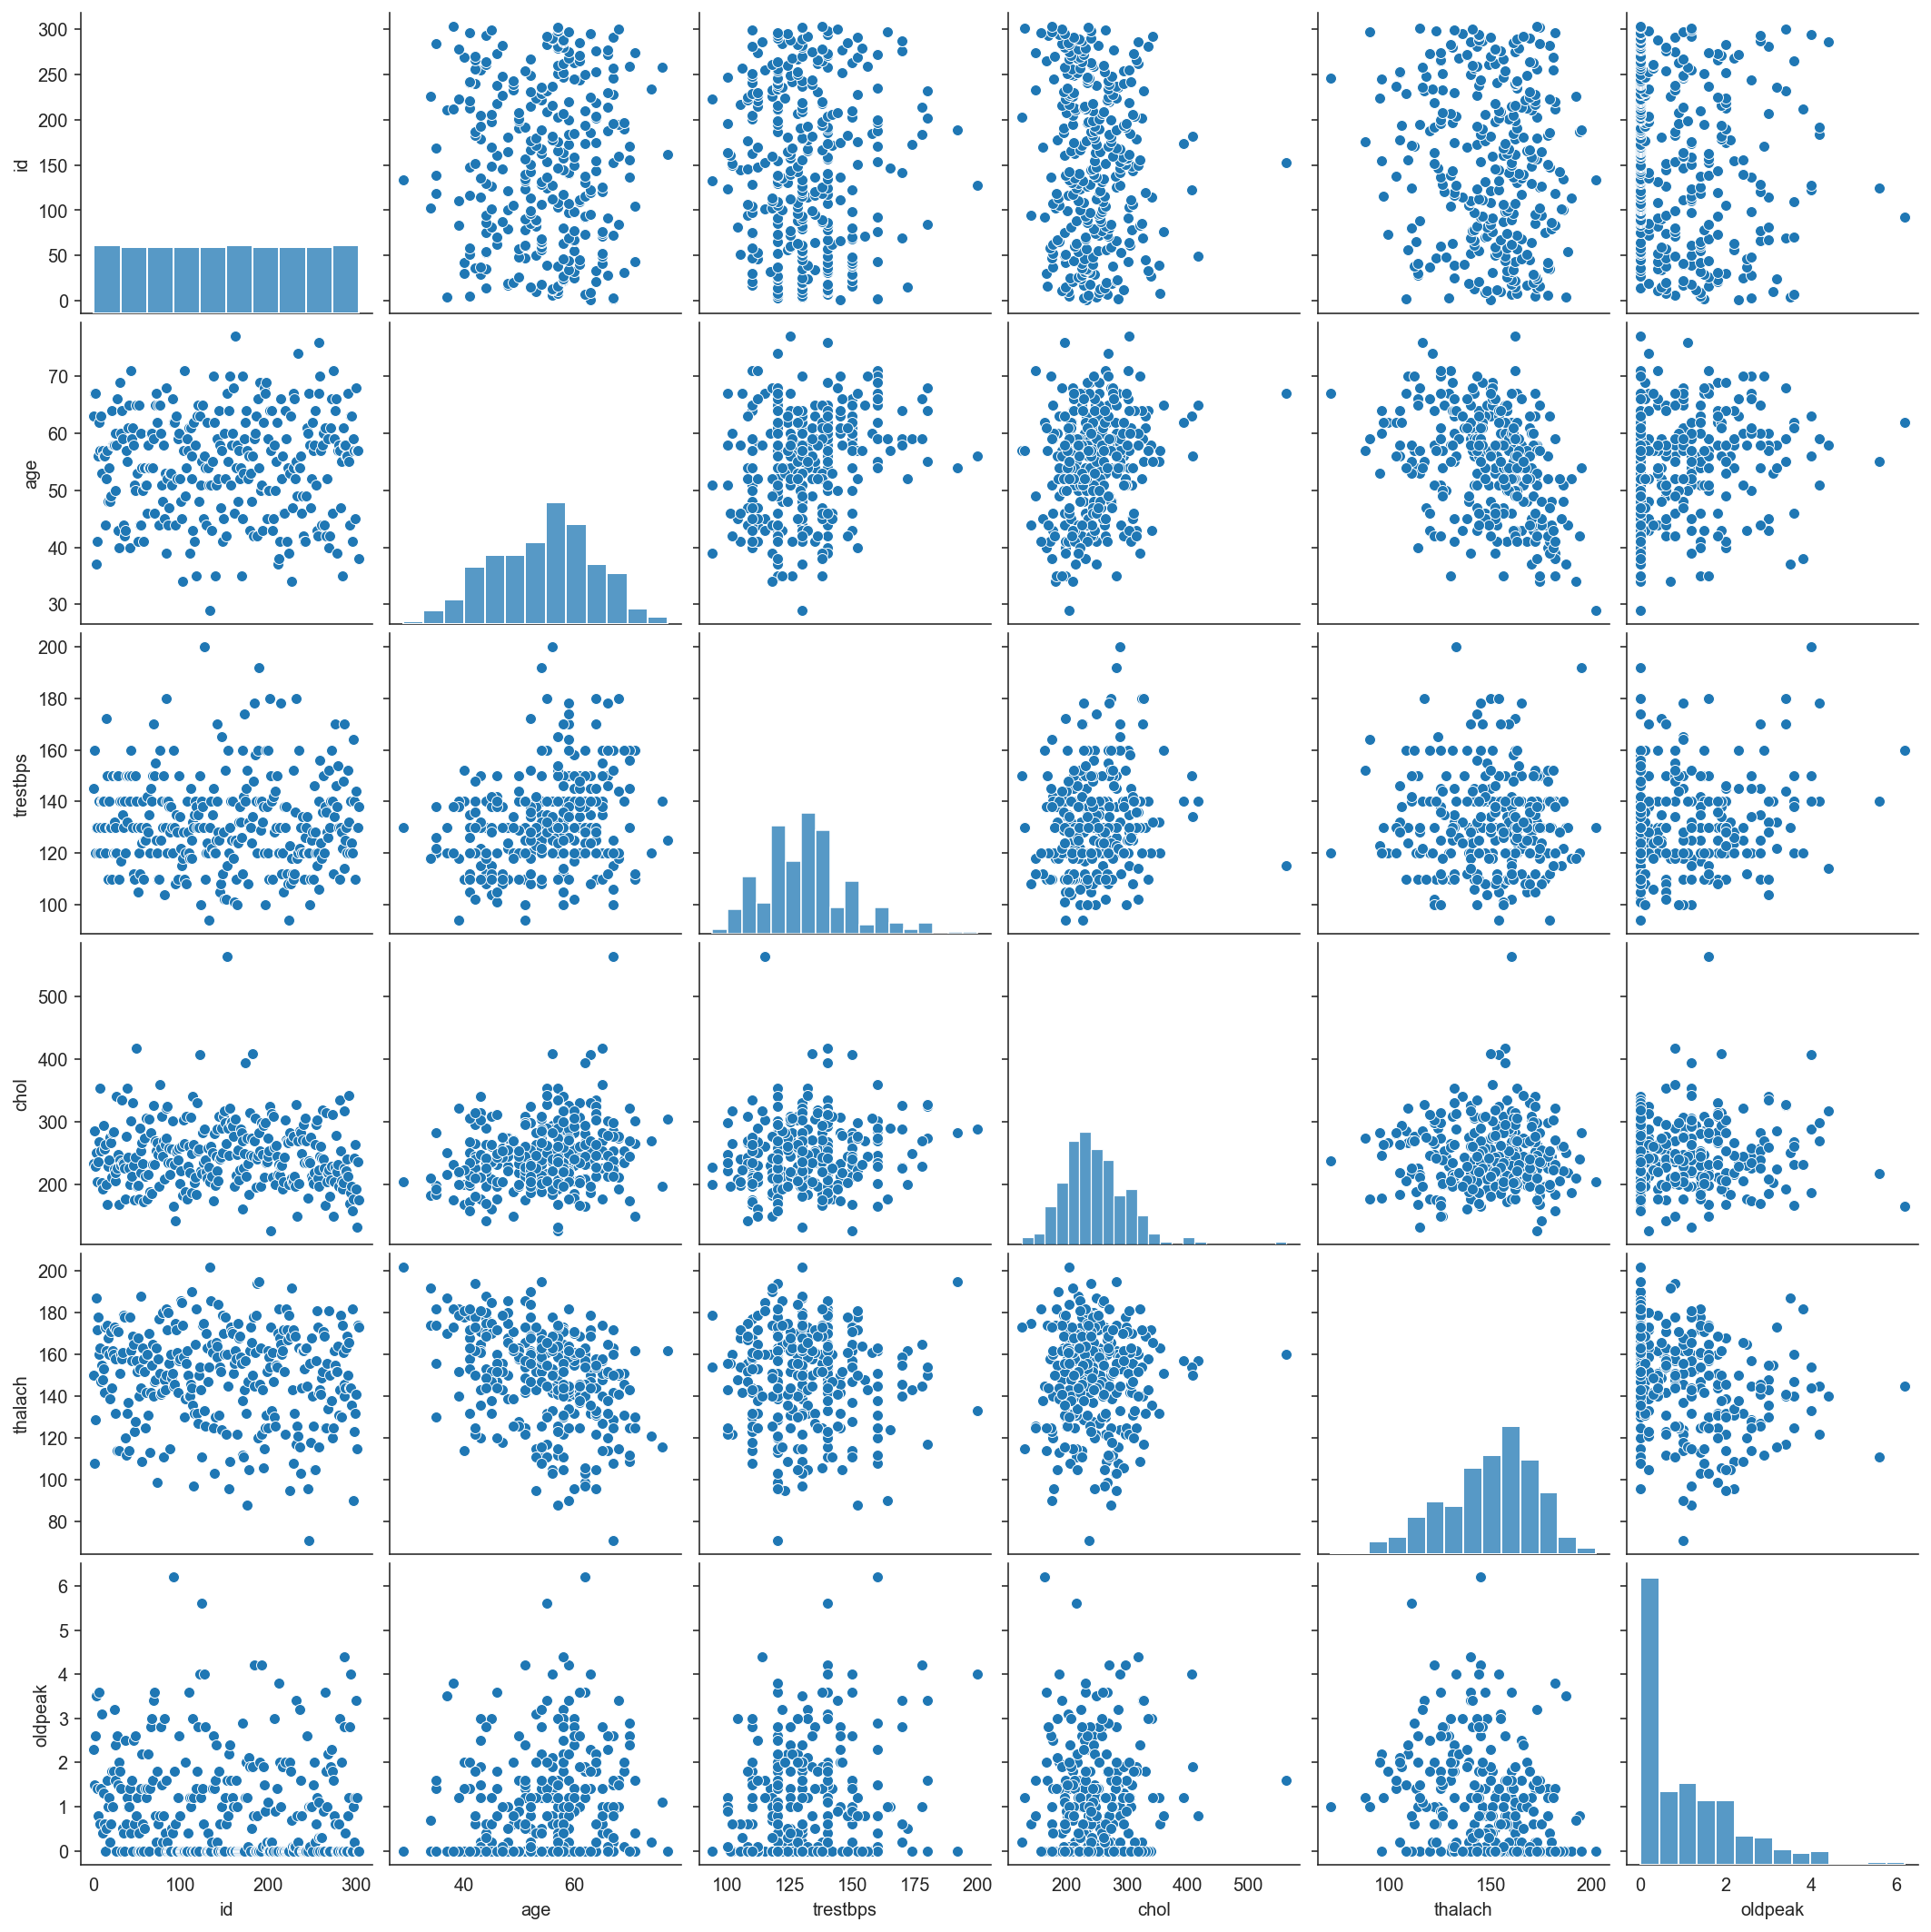

In [14]:
# 5. pairplot по числовым переменным
sns.pairplot(heart_num)

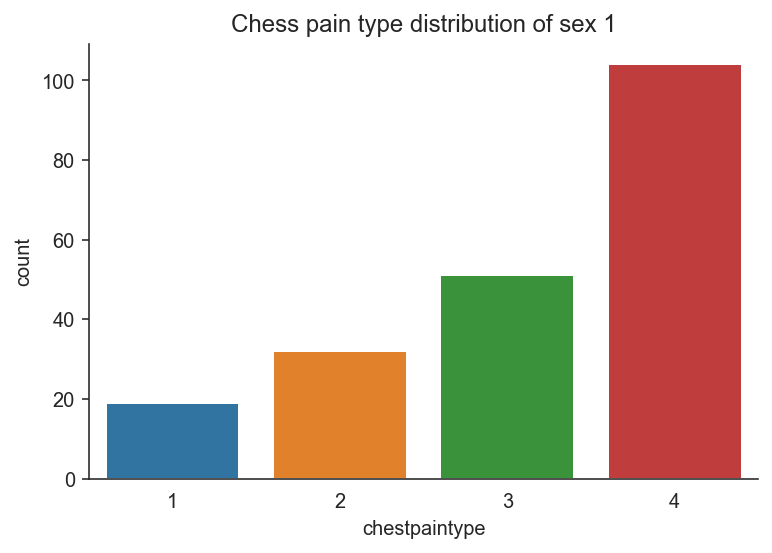

In [15]:
# 6. какой тип боли чаще всего испытывают пациенты? Покажите мужчин и женщин по отдельности
# heart['chestpaintype'].value_counts()
heart_1 = heart[heart['sex'] == '1']['chestpaintype'].reset_index()
heart_0 = heart[heart['sex'] == '0']['chestpaintype'].reset_index()

ax = sns.countplot(x='chestpaintype', data=heart_1, order=['1', '2', '3', '4']) \
.set_title("Chess pain type distribution of sex 1")


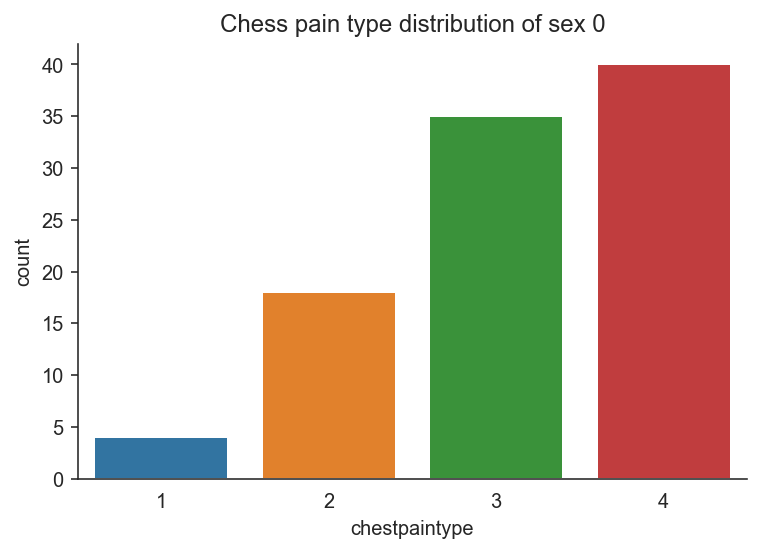

In [16]:
ax = sns.countplot(x='chestpaintype', data=heart_0, order=['1', '2', '3', '4']) \
.set_title("Chess pain type distribution of sex 0")

<AxesSubplot:xlabel='sex', ylabel='count'>

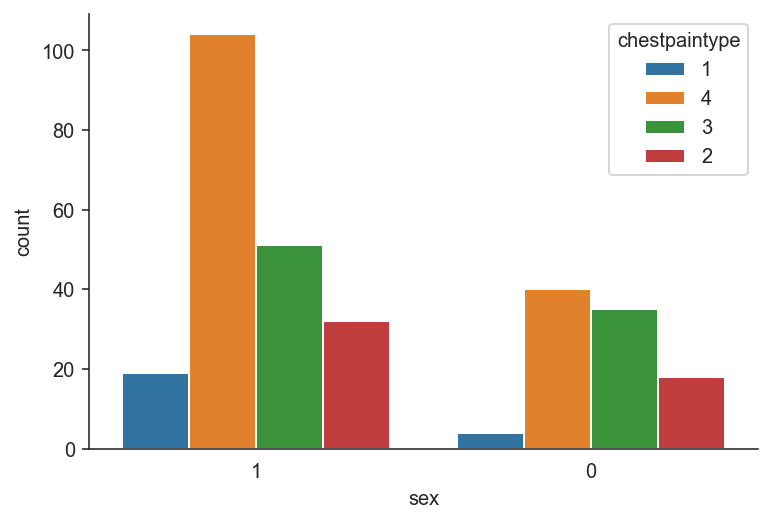

In [17]:
# или же 
sns.countplot(x='sex', hue='chestpaintype', data=heart)

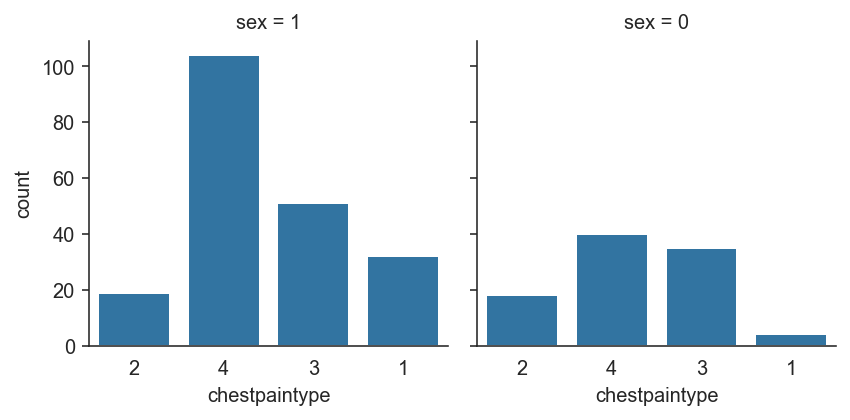

In [18]:
# 7. покажите какой тип боли чаще всего испытывают женщины и мужчины на разных графиках
g = sns.FacetGrid(heart, col="sex")
g.map_dataframe(sns.countplot, x="chestpaintype")

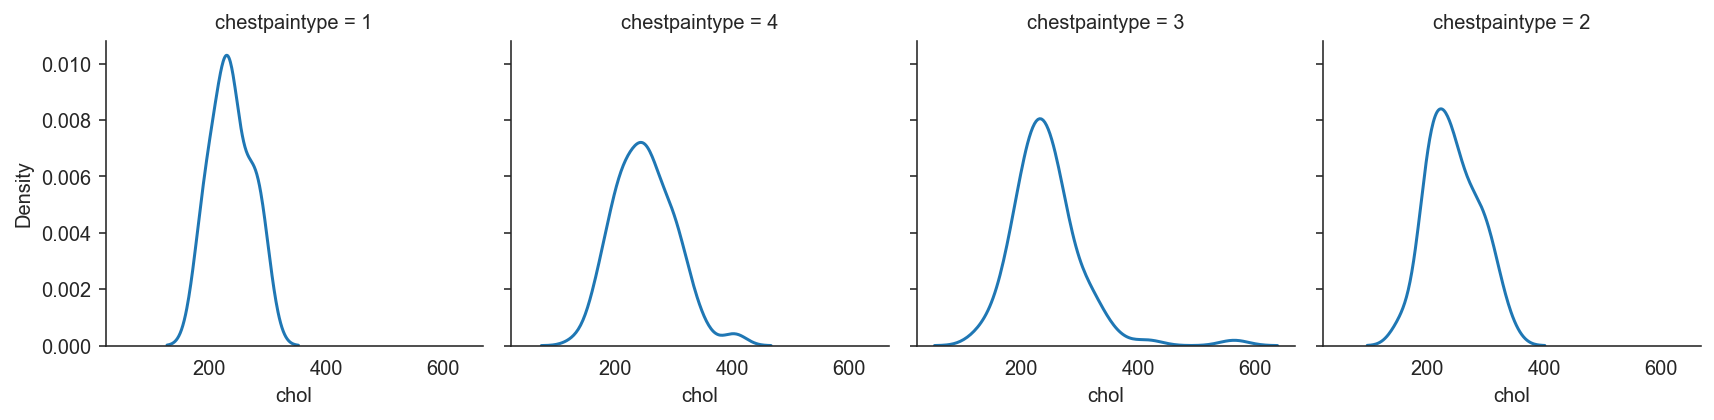

In [19]:
# chestpaintype - cholesterol distribution
g = sns.FacetGrid(heart, col="chestpaintype")
g.map(sns.kdeplot, "chol")

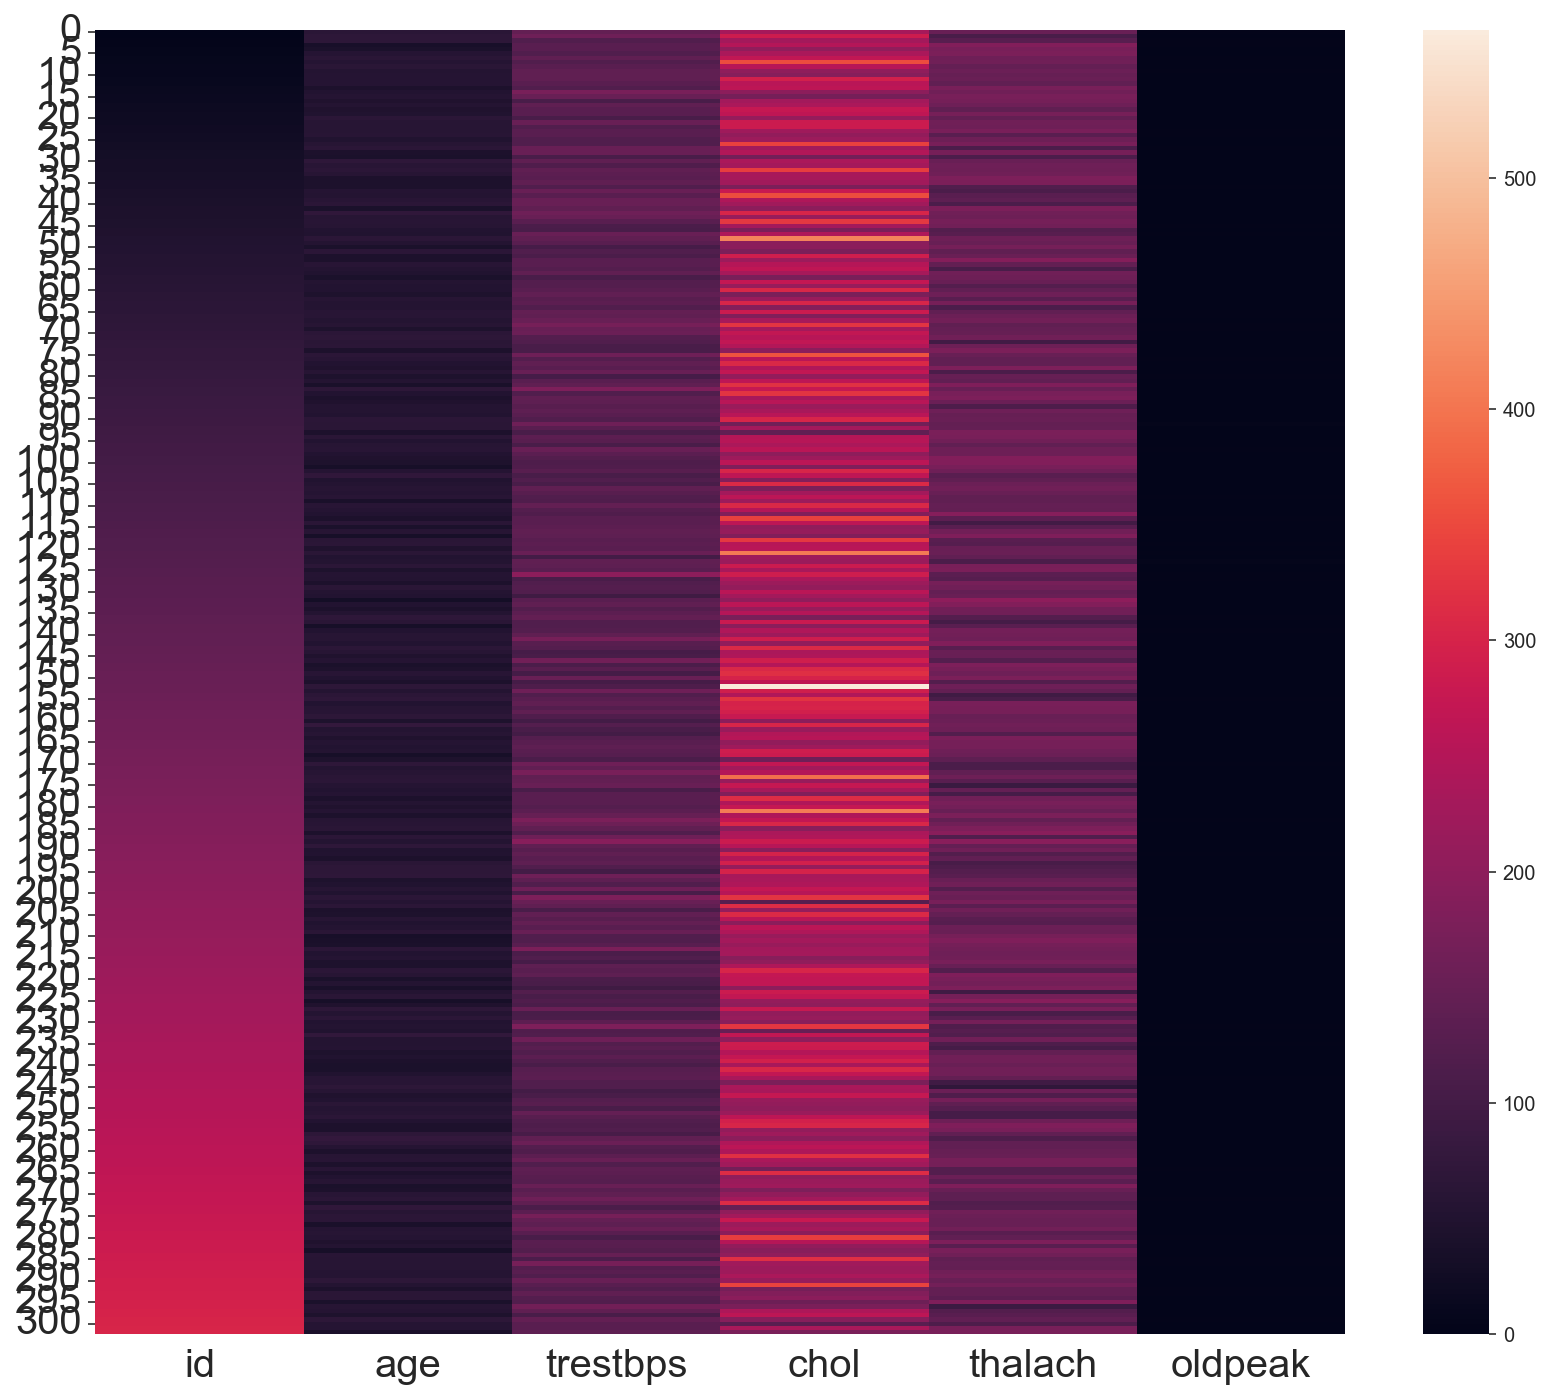

In [20]:
plt.figure(figsize=(14, 12))
sns.heatmap(heart_num)
plt.tick_params(labelsize=20)

Познакомьтесь с данными, используя визуализацию.

Не всё в EDA требует визуализации, поэтому можно включить сюда же любой другой анализ, какой вам хочется и кажется полезным - с графиками или без. Поскольку это EDA, то особую красоту наводить не понадобится, но постарайтесь оформить графики по рекомендациям, которые мы прошли на уроке.

In [21]:
# https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data_first150k.csv
wine = pd.read_csv('winemag-data_first150k.csv')

In [22]:
wine.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


<AxesSubplot:xlabel='points', ylabel='price'>

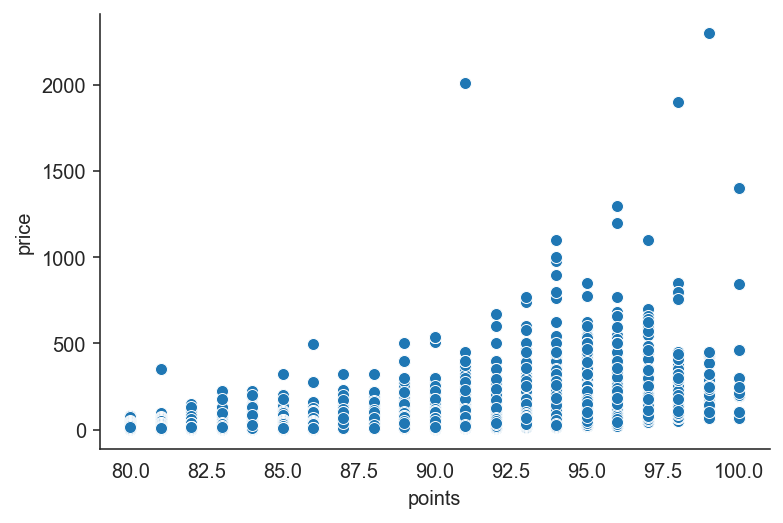

In [23]:
# какая связь связь между ценой на вино и его оценкой?
sns.scatterplot(data=wine, x='points', y='price')

In [24]:
# какие сорта вина (variety) чаще встречаются в датасете и у какого из них лучшие оценки?
print('5 most frequent wine types:' , end=' ')
print(*wine.variety.value_counts().reset_index().iloc[:5]['index'], sep=', ')

5 most frequent wine types: Chardonnay, Pinot Noir, Cabernet Sauvignon, Red Blend, Bordeaux-style Red Blend


In [25]:
wine[wine['variety'].isin(wine.variety.value_counts().reset_index().iloc[:5]['index'])]\
.groupby('variety')['points'].mean().reset_index().rename(columns={'points': 'mean points'})

,variety,mean points
0,Bordeaux-style Red Blend,89.466857
1,Cabernet Sauvignon,88.080391
2,Chardonnay,87.746789
3,Pinot Noir,88.719404
4,Red Blend,88.063606


<AxesSubplot:xlabel='price', ylabel='Density'>

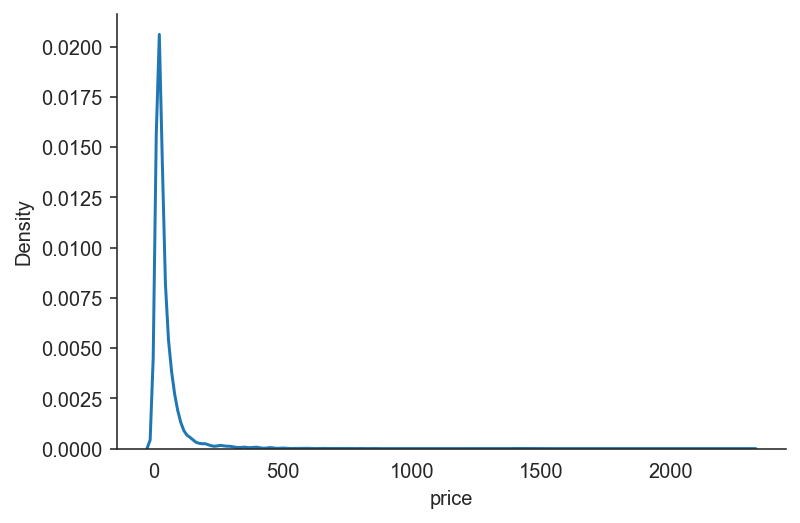

In [26]:
# как распределены цены на французское вино?
sns.kdeplot(data=wine[wine['country'] == 'France'], x='price')

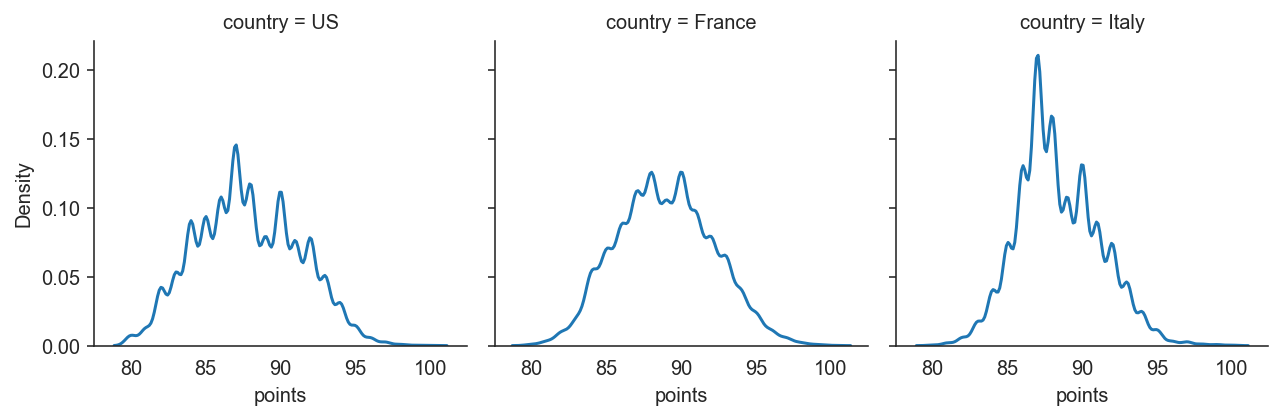

In [27]:
# сравните распределение оценок для трёх самых "винных" стран

# самые винные - по количеству произведенного вина. Хотя это можно оспорить, но для этой задачи определим их так
top_3 = wine['country'].value_counts().reset_index().iloc[:3]['index']
g = sns.FacetGrid(wine[wine['country'].isin(top_3)], col="country")
g.map(sns.kdeplot, "points")


In [28]:
wine.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [29]:
# какие винодельни продают самое дорогое вино?
print('Top 5 wineries with the most expensive wine:', end=' ')
print(*wine.sort_values('price', ascending=False).reset_index().iloc[:5]['winery'], sep=', ')
   

Top 5 wineries with the most expensive wine: Château Latour, Blair, Château Margaux, Krug, Krug
